In [1]:
# POPULATION ANALYSIS - TRAINED DATA, no familiarity effect. regulation carries on

# import list
%reload_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import main_funcs as mfun
import utils_funcs as utils
import plot_funcs as pfun
import matplotlib.pyplot as plt
import pickle
from scipy import stats
from itertools import compress
import seaborn as sns
from sklearn import preprocessing
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import glob as glob
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category= FutureWarning) 

#paths
savefigpath  = r'G:\My Drive\Manuscripts\1 CLAStPFC\panels_raw' 
'G:\\My Drive\\Manuscripts\\3 CLAStPFC\\figuresForCLAStPFC\\figurePanels\\'
analysispath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\'

Env: clapfcstimulation


In [2]:
# Define cell information
cell_info = [
    {
        's_recDate': '2022-04-18', #CELL1
        's_animalID': 22103,
        's_recID': 3,
        's_cellID': 46,
        'cell_title': 'Stimulation enhanced\nvisual response',
        'y_min': -1,
        'y_max': 2.5,
    },
    {
        's_recDate': '2021-05-07', #cell4
        's_animalID': 21105,
        's_recID': 2,
        's_cellID': 88,
        'cell_title': 'Stimulation reduced\nvisual response',
        'y_min': -0.5,
        'y_max': 2,
    },
    {
        's_recDate': '2023-08-17', #cell3 - opto responsive 
        's_animalID': 2304,
        's_recID': 3,
        's_cellID': 258,
        'cell_title': 'Stimulation induced not-visual response',
        'y_min': -0.5,
        'y_max': 2,
    },
    {
        's_recDate': '2022-04-07',#CELL5
        's_animalID': 22101,
        's_recID': 4,
        's_cellID': 82,
        'cell_title': 'Opto boosted visual response',
        'y_min': -1,
        'y_max': 2.5,
    },
]
#     {
#         's_recDate': '2022-04-12', #CELL3
#         's_animalID': 22103,
#         's_recID': 6,
#         's_cellID': 184,
#         'cell_title': 'Opto boosted \nEnhanced visual response - Inhibited response',
#         'y_min': -3,
#         'y_max': 5,
#     },
#     {
#         's_recDate': '2021-05-07', #cell6
#         's_animalID': 21105,
#         's_recID': 3,
#         's_cellID': 208,
#         'cell_title': 'Opto boosted cells\nReduced visual response',
#         'y_min': -3,
#         'y_max': 1.1,
#     },
# ]

        # 's_recDate': '2022-04-12', #cell2
        # 's_animalID': 22107,
        # 's_recID': 2,
        # 's_cellID': 296,
        # 'cell_title': 'Stimulation reduced\ninhibited visual response',
        # 'y_min': -35,
        # 'y_max': 10,

Sensory - Total animal number for 6
All cell number:2621
Any responsive cell number:1189
Responsice to  visual and opto but not both cell number:92
Visual cue - all visual responsive cells: 449
Visual cue - only visual responsive: 210
Visual only cue - EXC opto responsive: 0.5011135857461024
Visual only cue - INH opto responsive: 0.49888641425389757
Opto stimulation - all opto responsive cells: 642
Opto stimulation - only opto responsive: 356
Opto stimulation - EXC opto responsive: 0.2866043613707165
Opto stimulation - INH opto responsive: 0.7133956386292835
Both - all both responsive cells:531
Both - only both responsive: 262
Both - EXC opto responsive: 0.3320610687022901
Both - INH opto responsive: 0.6679389312977099
All cell number:1583
Any responsive cell number:819
Responsice to  visual and opto but not both cell number:59
Visual cue - all visual responsive cells: 328
Visual cue - only visual responsive: 130
Visual only cue - EXC opto responsive: 0.39939024390243905
Visual only cu

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


All cell number:1834
Any responsive cell number:1148
Responsice to  visual and opto but not both cell number:117
Visual cue - all visual responsive cells: 440
Visual cue - only visual responsive: 130
Visual only cue - EXC opto responsive: 0.48409090909090907
Visual only cue - INH opto responsive: 0.5159090909090909
Opto stimulation - all opto responsive cells: 745
Opto stimulation - only opto responsive: 317
Opto stimulation - EXC opto responsive: 0.3610738255033557
Opto stimulation - INH opto responsive: 0.6389261744966444
Both - all both responsive cells:584
Both - only both responsive: 204
Both - EXC opto responsive: 0.3382352941176471
Both - INH opto responsive: 0.6617647058823529
Sensory - Total animal number for 6
All cell number:2621
Any responsive cell number:1189
Responsice to  visual and opto but not both cell number:92
Visual cue - all visual responsive cells: 449
Visual cue - only visual responsive: 210
Visual only cue - EXC opto responsive: 0.5011135857461024
Visual only c

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


All cell number:1416
Any responsive cell number:693
Responsice to  visual and opto but not both cell number:44
Visual cue - all visual responsive cells: 247
Visual cue - only visual responsive: 100
Visual only cue - EXC opto responsive: 0.5020242914979757
Visual only cue - INH opto responsive: 0.4979757085020243
Opto stimulation - all opto responsive cells: 389
Opto stimulation - only opto responsive: 198
Opto stimulation - EXC opto responsive: 0.31876606683804626
Opto stimulation - INH opto responsive: 0.6812339331619537
Both - all both responsive cells:351
Both - only both responsive: 156
Both - EXC opto responsive: 0.5128205128205128
Both - INH opto responsive: 0.48717948717948717
Sensory - Total animal number for 6
All cell number:806
Any responsive cell number:252
Responsice to  visual and opto but not both cell number:16
Visual cue - all visual responsive cells: 83
Visual cue - only visual responsive: 39
Visual only cue - EXC opto responsive: 0.6746987951807228
Visual only cue - 

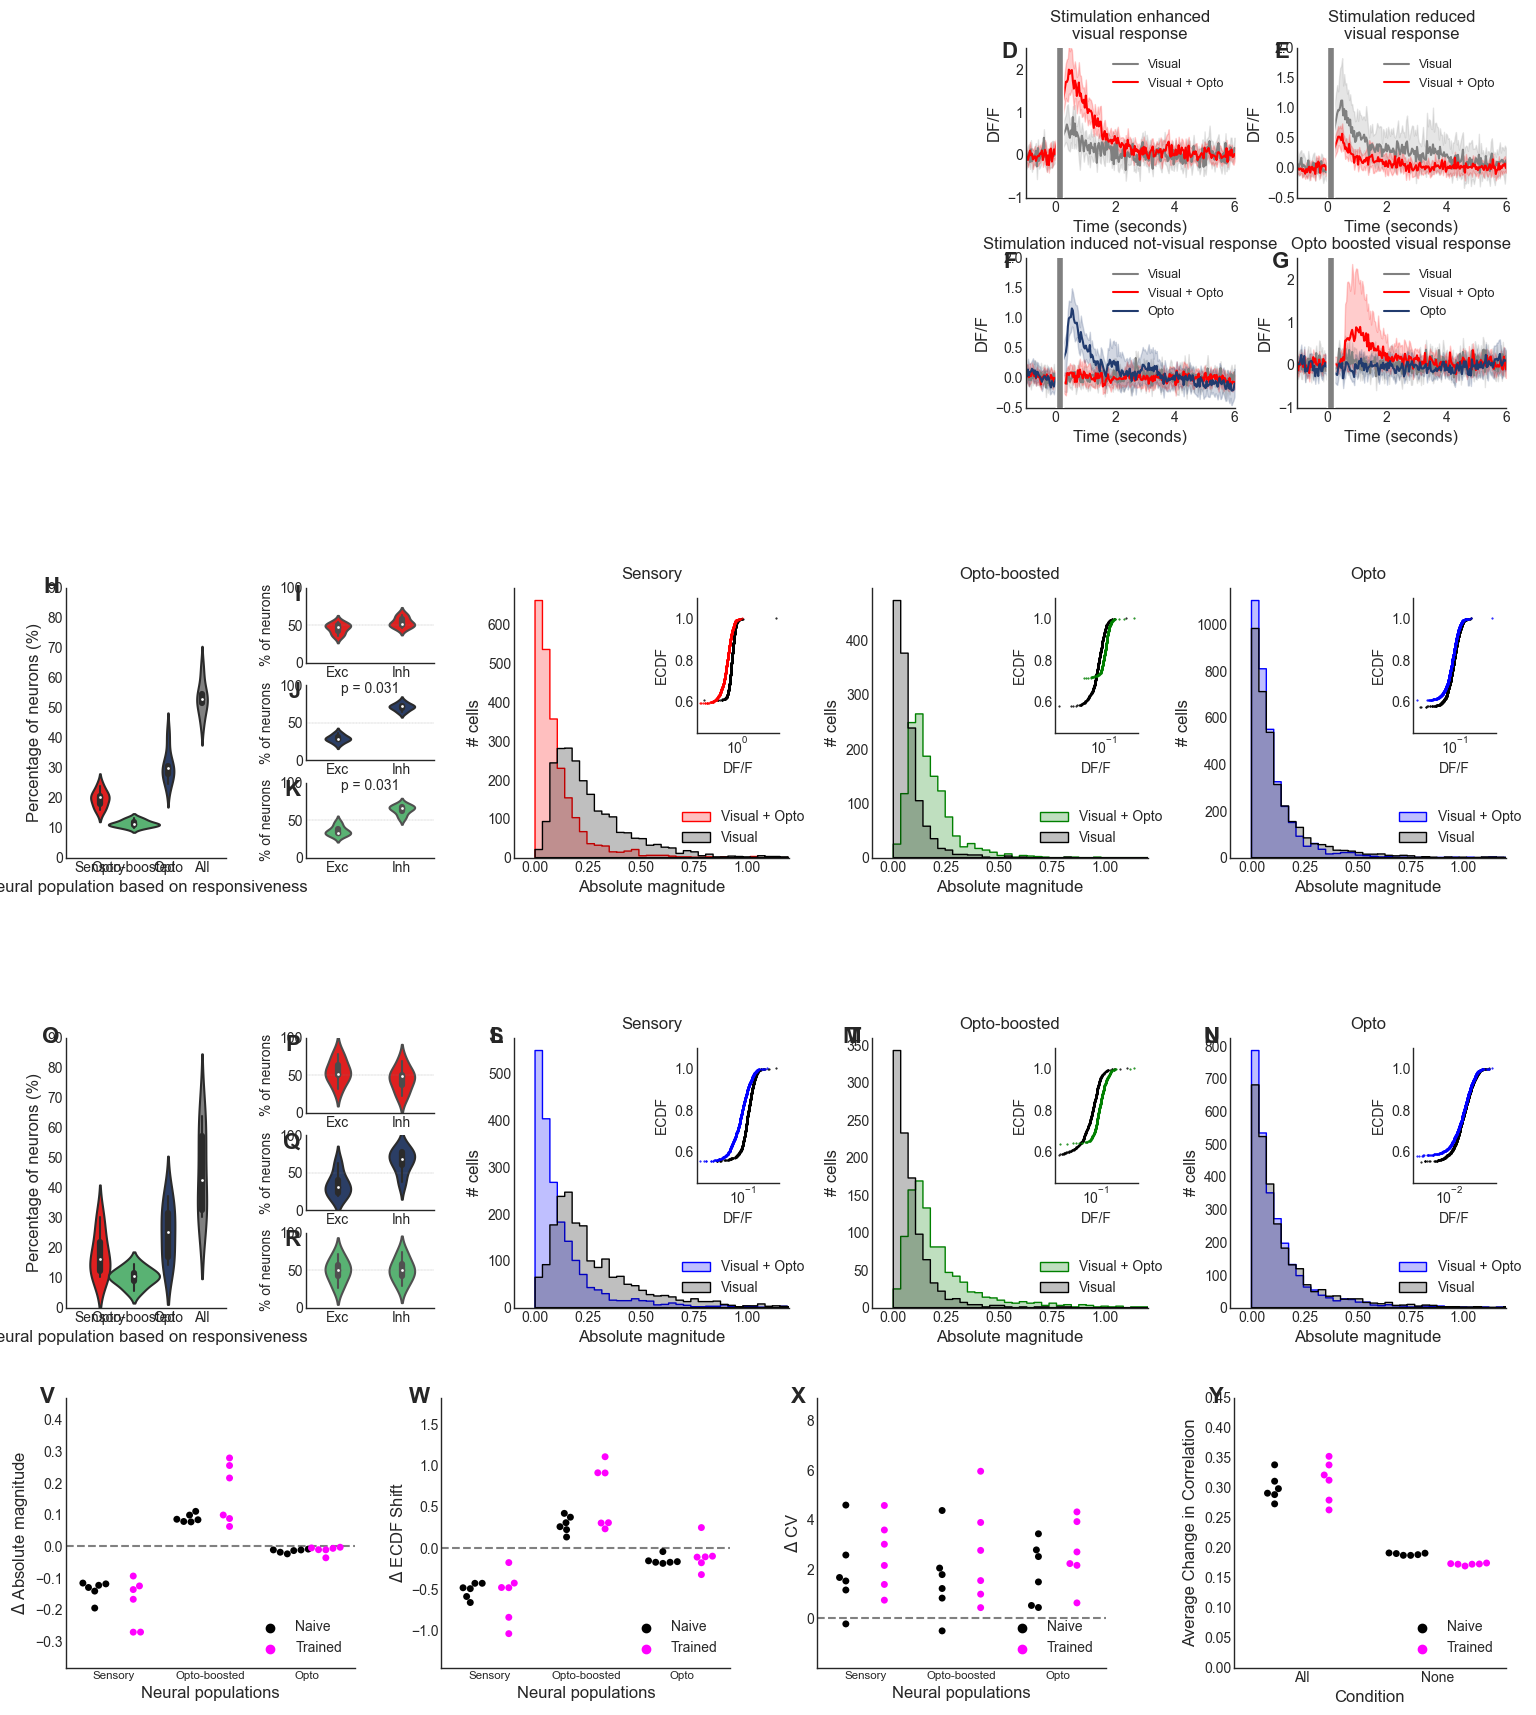

In [6]:
# Figure 4 : OPN3 mice - NAIVE & TRAINED population analysis
interestedCohort = 'OPN3'
interestedTrainedLevel = 'Naive'
plotParams = {
    'ylimitsforhist': [0, 750],
    'xlimitsforhist': [-0.75, 0.75],
    'analysis_time': 1500,  # in ms
    'colorbarlimitsForHeatMap': [-1, 1],
    'scatterplotlimits': [-4.5, 4.5],
    'ylimitsforECDF': [0.6, 1.1],
    'xlimitsforABS': [-0.1, 1.2],
    'xlimitsforCV': [-3, 3],
    'faceColors': ['black','red'],
            }

pfun.set_figure()
fig = plt.figure(constrained_layout=False, figsize=(16, 18)) # 8,11 for full A4 page

# set gridspecs
gs_exampleCellTraces    = fig.add_gridspec(ncols=2, nrows=2, bottom=0.75, top=0.95, left=0.65,right=0.95,
                              wspace=0.3, hspace=0.4)

gs_cellRatiosNaive          = fig.add_gridspec(ncols=1, nrows=1, bottom=0.50, top=0.65, left=0.05, right=0.15,
                              wspace=0.3, hspace=0.4)
gs_E_I_RatiosNaive          = fig.add_gridspec(ncols=1, nrows=3, bottom=0.50, top=0.65, left=0.20, right=0.28,
                              wspace=0.2, hspace=0.3)
gs_histogramsNaive          = fig.add_gridspec(ncols=3, nrows=1, bottom=0.50, top=0.65, left=0.33, right=0.95,
                              wspace=0.3, hspace=0.4)

gs_cellRatiosTrained        = fig.add_gridspec(ncols=1, nrows=1, bottom=0.25, top=0.40, left=0.05, right=0.15,
                              wspace=0.3, hspace=0.4)
gs_E_I_RatiosTrained        = fig.add_gridspec(ncols=1, nrows=3, bottom=0.25, top=0.40, left=0.20, right=0.28,
                              wspace=0.2, hspace=0.3)
gs_histogramsTrained        = fig.add_gridspec(ncols=3, nrows=1, bottom=0.25, top=0.40, left=0.33, right=0.95,
                              wspace=0.3, hspace=0.4)

gs_Summary                  = fig.add_gridspec(ncols=3, nrows=1, bottom=0.05, top=0.20, left=0.05, right=0.70, 
                              wspace=0.3, hspace=0.1)
# gs_correlation              = fig.add_gridspec(ncols=2, nrows=1, bottom=0.20, top=0.35, left=0.15, right=0.55, 
#                               wspace=0, hspace=0.1)
gs_correlationMean          = fig.add_gridspec(ncols=1, nrows=1, bottom=0.05, top=0.20, left=0.78, right=0.95, 
                               wspace=0.4, hspace=0.1)

# Panel C: Example cell traces
total_num_axis = gs_exampleCellTraces.get_geometry()[0]* gs_exampleCellTraces.get_geometry()[1]
ax_gs_exampleTrainingSession = {xx: fig.add_subplot(gs_exampleCellTraces[xx]) for xx in range(total_num_axis)}
tTypes = ['Visual', 'Visual + Opto' ]
for i, cell_info_dict in enumerate(cell_info):
    ax = ax_gs_exampleTrainingSession[i]
    if i>1:
        tTypes = ['Visual','Visual + Opto','Opto']
    pfun.plot_cell_trace(ax, analysispath, tTypes, **cell_info_dict)

####### NAIVE DATA
interestedTrainedLevel = 'Naive'
total_num_axis = gs_cellRatiosNaive.get_geometry()[0]* gs_cellRatiosNaive.get_geometry()[1]
ax_gs_cellRatiosNaive = {xx: fig.add_subplot(gs_cellRatiosNaive[xx]) for xx in range(total_num_axis)}
pfun.plot_cellRatiosPerAnimal('All', [interestedCohort],[interestedTrainedLevel], ax=ax_gs_cellRatiosNaive[0], 
                              savefigname=None, savefigpath=None)

#  Barplot for cell ratios
total_num_axis = gs_E_I_RatiosNaive.get_geometry()[0]* gs_E_I_RatiosNaive.get_geometry()[1]
ax_gs_E_I_Ratios = {xx: fig.add_subplot(gs_E_I_RatiosNaive[xx]) for xx in range(3)}
pfun.plot_cellRatiosPerAnimal('Sensory', [interestedCohort], [interestedTrainedLevel], ax=ax_gs_E_I_Ratios[0],
                              savefigname=None, savefigpath=None, ComparePlot = False)
pfun.plot_cellRatiosPerAnimal('Opto', [interestedCohort], [interestedTrainedLevel], ax=ax_gs_E_I_Ratios[1],
                              savefigname=None, savefigpath=None, ComparePlot = False)
pfun.plot_cellRatiosPerAnimal('Opto-boosted', [interestedCohort], [interestedTrainedLevel], ax=ax_gs_E_I_Ratios[2],
                              savefigname=None, savefigpath=None, ComparePlot = False)

# Histograms
total_num_axis = gs_histogramsNaive.get_geometry()[0]* gs_histogramsNaive.get_geometry()[1]
ax_gs_histogramNaive = {xx: fig.add_subplot(gs_histogramsNaive[xx]) for xx in range(total_num_axis)}
plotParams['ylimitsforECDF'] = [0.45, 1.1]
pfun.plot_magnitude('Visual', 'Visual + Opto', cohort=interestedCohort,
                    trainedLevel= interestedTrainedLevel, condition='Sensory',
                    plotParams = plotParams,axisAll=ax_gs_histogramNaive[0])

plotParams['faceColors'] = ['black', 'green']
pfun.plot_magnitude('Visual', 'Visual + Opto', cohort=interestedCohort,
                    trainedLevel= interestedTrainedLevel, condition='Opto-boosted',
                    plotParams = plotParams,axisAll=ax_gs_histogramNaive[1])
plotParams['faceColors'] = ['black', 'blue']
pfun.plot_magnitude('Visual', 'Visual + Opto', cohort=interestedCohort,
                    trainedLevel= interestedTrainedLevel, condition='Opto',
                    plotParams = plotParams,axisAll=ax_gs_histogramNaive[2])

##### Next row: TRAINED DATA
interestedTrainedLevel = 'Trained'
total_num_axis = gs_cellRatiosTrained.get_geometry()[0]* gs_cellRatiosTrained.get_geometry()[1]
ax_gs_cellRatiosTrained = {xx: fig.add_subplot(gs_cellRatiosTrained[xx]) for xx in range(total_num_axis)}
pfun.plot_cellRatiosPerAnimal('All', [interestedCohort],[interestedTrainedLevel], ax=ax_gs_cellRatiosTrained[0], 
                              savefigname=None, savefigpath=None, ComparePlot = False)

#  Barplot for cell ratios
total_num_axis = gs_E_I_RatiosTrained.get_geometry()[0]* gs_E_I_RatiosTrained.get_geometry()[1]
ax_gs_E_I_RatiosTr = {xx: fig.add_subplot(gs_E_I_RatiosTrained[xx]) for xx in range(3)}
pfun.plot_cellRatiosPerAnimal('Sensory', [interestedCohort], [interestedTrainedLevel], ax=ax_gs_E_I_RatiosTr[0],
                              savefigname=None, savefigpath=None,ComparePlot = False)
pfun.plot_cellRatiosPerAnimal('Opto', [interestedCohort], [interestedTrainedLevel], ax=ax_gs_E_I_RatiosTr[1],
                              savefigname=None, savefigpath=None,ComparePlot = False)
pfun.plot_cellRatiosPerAnimal('Opto-boosted', [interestedCohort], [interestedTrainedLevel], ax=ax_gs_E_I_RatiosTr[2],
                              savefigname=None, savefigpath=None,ComparePlot = False)

# Histograms
total_num_axis = gs_histogramsTrained.get_geometry()[0]* gs_histogramsTrained.get_geometry()[1]
ax_gs_histogramNaive = {xx: fig.add_subplot(gs_histogramsTrained[xx]) for xx in range(total_num_axis)}
pfun.plot_magnitude('Visual', 'Visual + Opto', cohort=interestedCohort,
                    trainedLevel= interestedTrainedLevel, condition='Sensory',
                    plotParams = plotParams,axisAll=ax_gs_histogramNaive[0])

plotParams['faceColors'] = ['black', 'green']
pfun.plot_magnitude('Visual', 'Visual + Opto', cohort=interestedCohort,
                    trainedLevel= interestedTrainedLevel, condition='Opto-boosted',
                    plotParams = plotParams,axisAll=ax_gs_histogramNaive[1])
plotParams['faceColors'] = ['black', 'blue']
pfun.plot_magnitude('Visual', 'Visual + Opto', cohort=interestedCohort,
                    trainedLevel= interestedTrainedLevel, condition='Opto',
                    plotParams = plotParams,axisAll=ax_gs_histogramNaive[2])

###### Summary
total_num_axis = gs_Summary.get_geometry()[0]* gs_Summary.get_geometry()[1]
ax_gs_Summary = {xx: fig.add_subplot(gs_Summary[xx]) for xx in range(total_num_axis)}
pfun.plot_paramsDiffPerAnimal('ABS', [interestedCohort], ['Naive', 'Trained'], ax= ax_gs_Summary[0], savefigname=None, savefigpath=None, ComparePlot= True)
pfun.plot_paramsDiffPerAnimal('ECDF Shift',  [interestedCohort], ['Naive', 'Trained'], ax= ax_gs_Summary[1], savefigname=None, savefigpath=None, ComparePlot= True)
pfun.plot_paramsDiffPerAnimal('CV',  [interestedCohort], ['Naive', 'Trained'], ax= ax_gs_Summary[2], savefigname=None, savefigpath=None, ComparePlot= True)


total_num_axis = gs_correlationMean.get_geometry()[0]* gs_correlationMean.get_geometry()[1]
ax_gs_correlationMean = {xx: fig.add_subplot(gs_correlationMean[xx]) for xx in range(total_num_axis)}
corrDiff = pfun.plot_correlationMatrix_meanChange(['Naive', 'Trained'], cohort=interestedCohort, 
                        responsiveness=['All', 'None'], params = 'All',
                       axs=ax_gs_correlationMean[0], savefigname=None, savefigpath=None)
# Lets add the labels
axes = [ax_gs_exampleTrainingSession, ax_gs_cellRatiosNaive, ax_gs_E_I_Ratios, ax_gs_histogramNaive, 
        ax_gs_cellRatiosTrained, ax_gs_E_I_RatiosTr, ax_gs_histogramNaive, ax_gs_Summary, ax_gs_correlationMean]
labels = ['D','E','F','G','H','I','J','K','L','M','N','O','P',
            'Q','R','S','T','U','V','W','X','Y','Z']
lInd = 0
for ax, label in zip(axes, labels):
    for key in ax:
        if lInd<300:
            ax[key].text(-0.04, 1.04, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        elif lInd>200:
            ax[key].text(-0.08, 1.1, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        else:
            ax[key].text(-0.04, 1.04, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        lInd += 1
savefigname = 'Figure4_OPN3_PopulationAnalysis'
pfun.save_figure(savefigname,savefigpath)
#plt.close()


Stats for Sensory
KS test for Visual and Visual + Opto is 0.29202401372212694 and p: 1.1200782205413212e-84
Pearson correlation coefficient for Visual and Visual + Opto is -0.9999998007911869 and p: 0.0 
7.194261730244169e-24
Stats for Opto-boosted
KS test for Visual and Visual + Opto is 0.3724035608308605 and p: 1.9233343198862124e-80
Pearson correlation coefficient for Visual and Visual + Opto is 0.5904772708878069 and p: 2.4339428209085477e-124 
1.9010928702797677e-16
Stats for Opto
KS test for Visual and Visual + Opto is 0.0530025373555117 and p: 0.3326259671991286
Pearson correlation coefficient for Visual and Visual + Opto is -0.9997883474268878 and p: 0.0 
8.661321243227662e-37
$\Delta$ Absolute magnitude - Total animal number for 6
[3.218104613493288e-05, 2.5210593459507757e-05]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


$\Delta$ ECDF Shift - Total animal number for 6
[0.0003455933231380203, 0.00011082129197223113]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


$\Delta$ CV - Total animal number for 6
[0.9140885269702494, 0.30992485029047956]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\Users\Huriye\Documents\code\clapfcstimulation\plot_funcs.py:1609: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.swarmplot(data=df, x='Condition', y='Average Change', hue='Group',
C:\Users\Huriye\AppData\Local\Temp\ipykernel_21500\4058283616.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


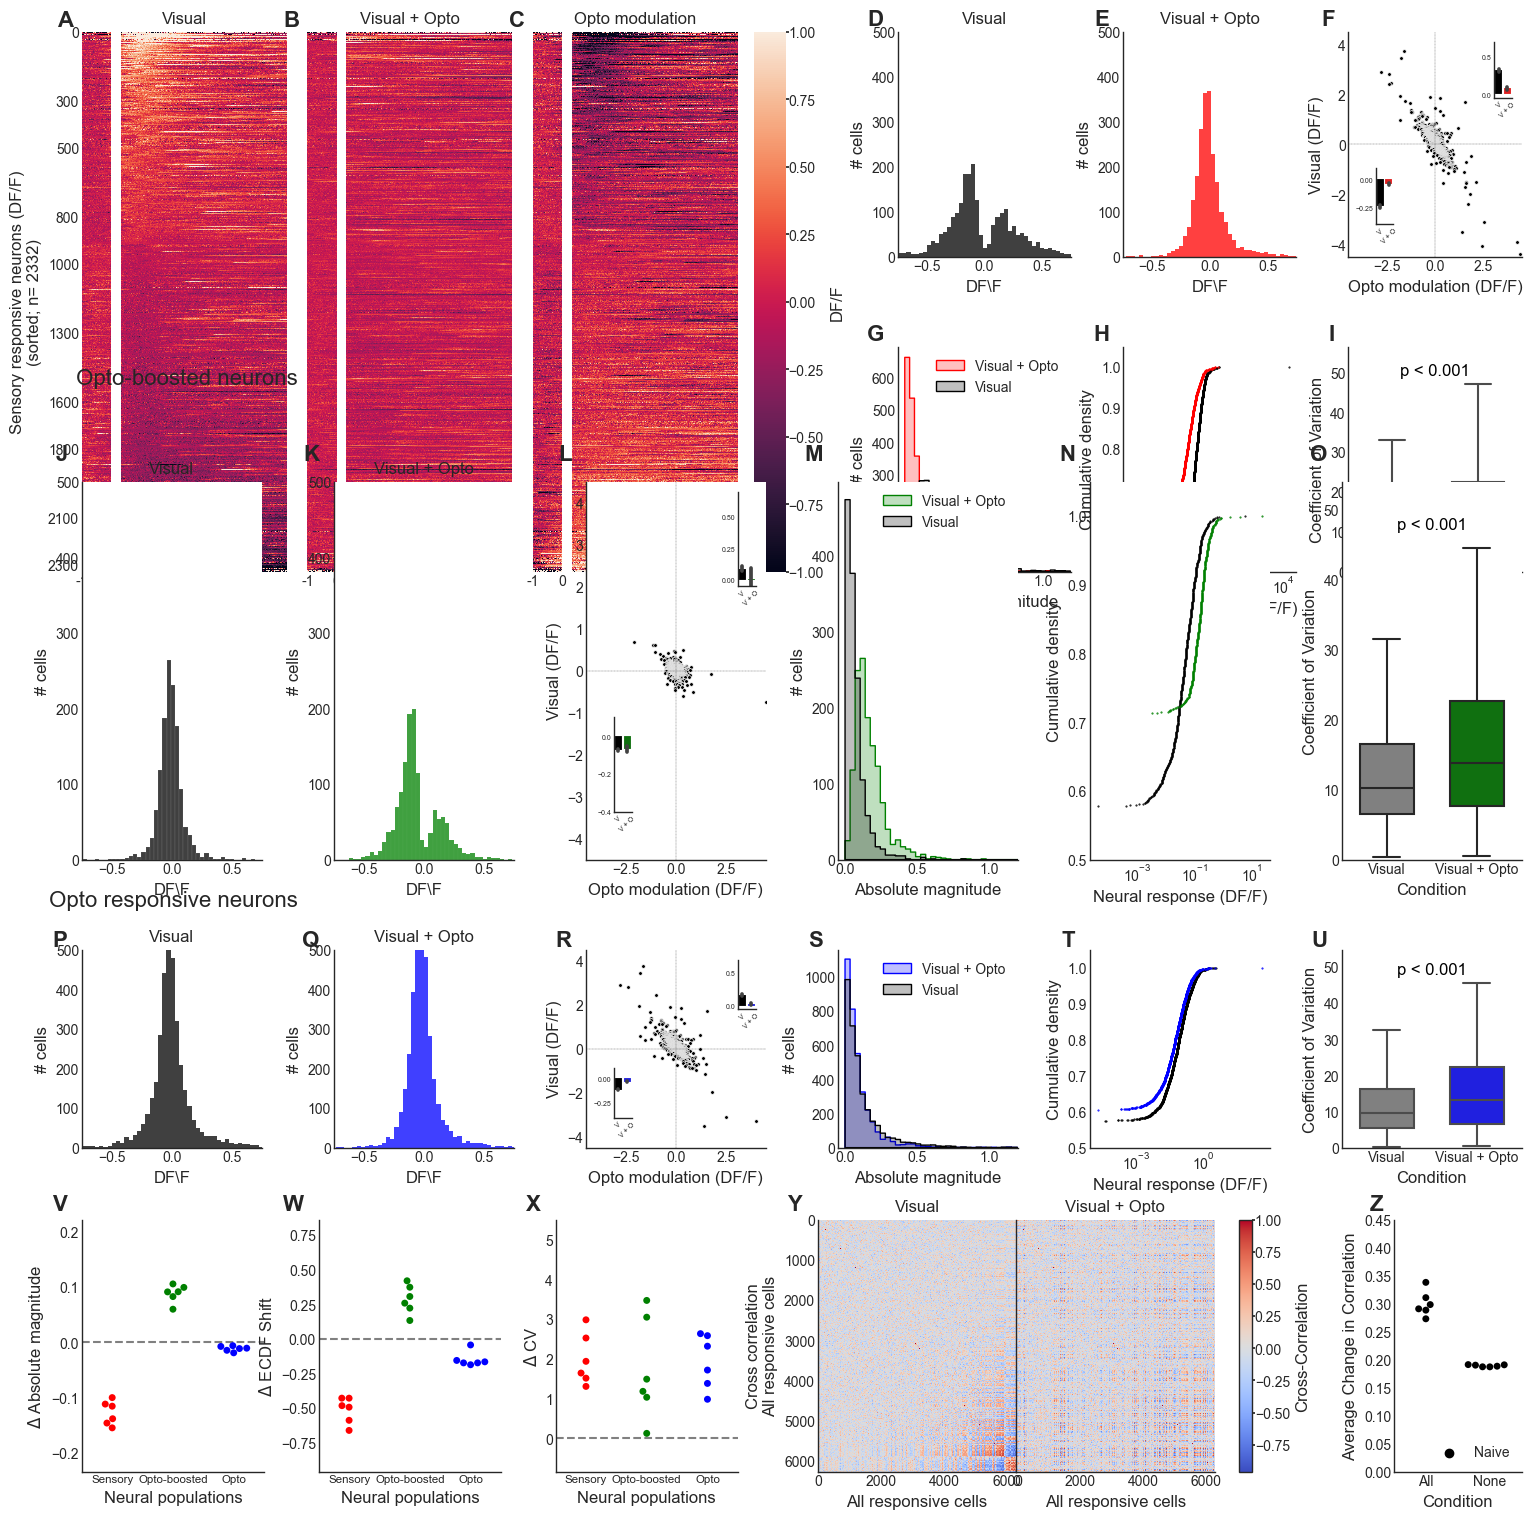

In [7]:
# Figure Supplementary : OPN3 mice - Naive population analysis

interestedCohort = 'OPN3'
interestedTrainedLevel = 'Naive'

pfun.set_figure()
fig = plt.figure(constrained_layout=False, figsize=(16, 18)) # 8,11 for full A4 page

# set gridspec

gs_visHeatmap  = fig.add_gridspec(ncols=3, nrows=1, bottom=0.65, top=0.95, left=0.05,right=0.46,
                              wspace=0.1, hspace=0.2)
gs_visHeatmapCax  = fig.add_gridspec(ncols=1, nrows=1, bottom=0.65, top=0.95, left=0.48, right=0.50,
                              wspace=0.2, hspace=0.4)
gs_visuaPlots  = fig.add_gridspec(ncols=3, nrows=2, bottom=0.65, top=0.95, left=0.56, right=0.95,
                              wspace=0.3, hspace=0.4)
gs_bothPlots   = fig.add_gridspec(ncols=6, nrows=1, bottom=0.49, top=0.70, left=0.05, right=0.95,
                              wspace=0.4, hspace=0.2)
gs_optoPlots   = fig.add_gridspec(ncols=6, nrows=1, bottom=0.33, top=0.44, left=0.05, right=0.95,
                              wspace=0.4, hspace=0.2)
gs_Summary     = fig.add_gridspec(ncols=3, nrows=1, bottom=0.15, top=0.29, left=0.05, right=0.46, 
                              wspace=0.3, hspace=0.1)
gs_correlation = fig.add_gridspec(ncols=2, nrows=1, bottom=0.15, top=0.29, left=0.51, right=0.82, 
                              wspace=0, hspace=0.1)
gs_correlationMean = fig.add_gridspec(ncols=1, nrows=1, bottom=0.15, top=0.29, left=0.87, right=0.95, 
                              wspace=0.4, hspace=0.1)


# Panel A: Heatmap for Visual responsive cells
ax_gs_visHeatmap = {xx: fig.add_subplot(gs_visHeatmap[xx]) for xx in range(3)}
cax =  {xx: fig.add_subplot(gs_visHeatmapCax[xx]) for xx in range(1)} 
colorbarlimitsForHeatMap = [-1,1] 
pfun.heatmap_comparison('Visual', 'Visual + Opto', sortType = 'Visual', cohort=interestedCohort, 
                       trainedLevel= interestedTrainedLevel, condition='Sensory',
                       colormapSelection = 'OptoProject', axis=ax_gs_visHeatmap, cbar_ax=cax[0], 
                       savefigname=None, savefigpath=None, colorbarlimits=colorbarlimitsForHeatMap)

# Panel B-G: Visual responsive cells analysis
plotParams = {
    'ylimitsforhist': [0, 500],
    'xlimitsforhist': [-0.75, 0.75],
    'analysis_time': 1500,  # in ms
    'colorbarlimitsForHeatMap': [-1, 1],
    'scatterplotlimits': [-4.5, 4.5],
    'ylimitsforECDF': [0.5, 1.05],
    'xlimitsforABS': [-0.05, 1.2],
    'ylimitsforCV': [0.1, 0.15],
    'faceColors': ['black','red'],
     }

total_num_axis = gs_visuaPlots.get_geometry()[0]* gs_visuaPlots.get_geometry()[1]
ax_gs_visuaPlots = {xx: fig.add_subplot(gs_visuaPlots[xx]) for xx in range(total_num_axis)}
pfun.population_plots('Visual', 'Visual + Opto', sortType = 'Visual', cohort=interestedCohort, 
                       trainedLevel=interestedTrainedLevel, condition='Sensory', plotParams = plotParams,
                       axisAll=ax_gs_visuaPlots, savefigname=None, savefigpath=None)

# Panel H-M: OptoBoosted responsive cells analysis
total_num_axis = gs_bothPlots.get_geometry()[0]* gs_bothPlots.get_geometry()[1]
ax_gs_bothPlots = {xx: fig.add_subplot(gs_bothPlots[xx]) for xx in range(total_num_axis)}
plotParams['faceColors'] = ['black', 'green']
pfun.population_plots('Visual', 'Visual + Opto', sortType = 'Visual', cohort=interestedCohort, 
                       trainedLevel=interestedTrainedLevel, condition='Opto-boosted', plotParams = plotParams,
                       axisAll=ax_gs_bothPlots, savefigname=None, savefigpath=None)

# Panel N-S: Opto responsive cells analysis
total_num_axis = gs_optoPlots.get_geometry()[0]* gs_optoPlots.get_geometry()[1]
ax_gs_optoPlots = {xx: fig.add_subplot(gs_optoPlots[xx]) for xx in range(total_num_axis)}
plotParams['faceColors'] = ['black', 'blue']
pfun.population_plots('Visual', 'Visual + Opto', sortType = 'Visual', cohort=interestedCohort, 
                       trainedLevel=interestedTrainedLevel, condition='Opto', plotParams = plotParams,
                       axisAll=ax_gs_optoPlots, savefigname=None, savefigpath=None)

# Panel T: SNR/CV summary results
total_num_axis = gs_Summary.get_geometry()[0]* gs_Summary.get_geometry()[1]
ax_gs_Summary = {xx: fig.add_subplot(gs_Summary[xx]) for xx in range(total_num_axis)}
pfun.plot_paramsDiffPerAnimal('ABS', [interestedCohort], [interestedTrainedLevel], ax= ax_gs_Summary[0], savefigname=None, savefigpath=None)
pfun.plot_paramsDiffPerAnimal('ECDF Shift',  [interestedCohort], [interestedTrainedLevel], ax = ax_gs_Summary[1], savefigname=None, savefigpath=None)
pfun.plot_paramsDiffPerAnimal('CV',  [interestedCohort], [interestedTrainedLevel], ax = ax_gs_Summary[2], savefigname=None, savefigpath=None)


# Panel T: Correlation matrix
total_num_axis = gs_correlation.get_geometry()[0]* gs_correlation.get_geometry()[1]
ax_gs_correlation = {xx: fig.add_subplot(gs_correlation[xx]) for xx in range(total_num_axis)}
pfun.plot_correlationMatrix('Visual', cohort=interestedCohort, 
                       trainedLevel=interestedTrainedLevel, responsiveness='All',
                       axs=[ax_gs_correlation[0],ax_gs_correlation[1]] ,savefigname=None, savefigpath=None)

total_num_axis = gs_correlationMean.get_geometry()[0]* gs_correlationMean.get_geometry()[1]
ax_gs_correlationMean = {xx: fig.add_subplot(gs_correlationMean[xx]) for xx in range(total_num_axis)}
pfun.plot_correlationMatrix_meanChange( ['Naive'], cohort=interestedCohort, 
                       responsiveness=['All', 'None'], params = 'All',
                       axs=ax_gs_correlationMean[0], savefigname=None, savefigpath=None)

# Lets add the labels
axes = [ax_gs_visHeatmap, ax_gs_visuaPlots, ax_gs_bothPlots, ax_gs_optoPlots,ax_gs_Summary,ax_gs_correlation,ax_gs_correlationMean]
labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P',
          'Q','R','S','T','U','V','W','X','Y','','Z']
lInd = 0
for ax, label in zip(axes, labels):
    for key in ax:
        if lInd<3:
            ax[key].text(-0.04, 1.04, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        elif lInd>2:
            ax[key].text(-0.08, 1.1, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        else:
            ax[key].text(-0.04, 1.04, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        lInd += 1

# Add some text in the figure        
axes[2][0].text(1.2, 1.3, 'Opto-boosted neurons', transform=axes[2][0].transAxes, fontsize=16, 
                        fontweight='normal', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))

axes[3][0].text(1.2, 1.3, 'Opto responsive neurons', transform=axes[3][0].transAxes, fontsize=16, 
                        fontweight='normal', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))

        
plt.tight_layout()
savefigname = 'Figure4Supp1_OPN3_NaivePopulationAnalysis'
pfun.save_figure(savefigname,savefigpath)
#plt.close()


In [ ]:
# Figure Supplementary : OPN3 mice - Trained population analysis

interestedCohort = 'OPN3'
interestedTrainedLevel = 'Trained'

pfun.set_figure()
fig = plt.figure(constrained_layout=False, figsize=(16, 18)) # 8,11 for full A4 page

# set gridspec

gs_visHeatmap  = fig.add_gridspec(ncols=3, nrows=1, bottom=0.65, top=0.95, left=0.05,right=0.46,
                              wspace=0.1, hspace=0.2)
gs_visHeatmapCax  = fig.add_gridspec(ncols=1, nrows=1, bottom=0.65, top=0.95, left=0.48, right=0.50,
                              wspace=0.2, hspace=0.4)
gs_visuaPlots  = fig.add_gridspec(ncols=3, nrows=2, bottom=0.65, top=0.95, left=0.56, right=0.95,
                              wspace=0.3, hspace=0.4)
gs_bothPlots   = fig.add_gridspec(ncols=6, nrows=1, bottom=0.47, top=0.58, left=0.05, right=0.95,
                              wspace=0.4, hspace=0.2)
gs_optoPlots   = fig.add_gridspec(ncols=6, nrows=1, bottom=0.29, top=0.40, left=0.05, right=0.95,
                              wspace=0.4, hspace=0.2)
gs_Summary     = fig.add_gridspec(ncols=3, nrows=1, bottom=0.10, top=0.24, left=0.05, right=0.46, 
                              wspace=0.3, hspace=0.1)
gs_correlation = fig.add_gridspec(ncols=2, nrows=1, bottom=0.10, top=0.24, left=0.51, right=0.82, 
                              wspace=0, hspace=0.1)
gs_correlationMean = fig.add_gridspec(ncols=1, nrows=1, bottom=0.10, top=0.24, left=0.87, right=0.95, 
                              wspace=0.4, hspace=0.1)


# Panel A: Heatmap for Visual responsive cells
ax_gs_visHeatmap = {xx: fig.add_subplot(gs_visHeatmap[xx]) for xx in range(3)}
cax =  {xx: fig.add_subplot(gs_visHeatmapCax[xx]) for xx in range(1)} 
colorbarlimitsForHeatMap = [-1,1] 
pfun.heatmap_comparison('Visual', 'Visual + Opto', sortType = 'Visual', cohort=interestedCohort, 
                       trainedLevel= interestedTrainedLevel, condition='Sensory',
                       colormapSelection = 'OptoProject', axis=ax_gs_visHeatmap, cbar_ax=cax[0], 
                       savefigname=None, savefigpath=None, colorbarlimits=colorbarlimitsForHeatMap)

# Panel B-G: Visual responsive cells analysis
plotParams = {
    'ylimitsforhist': [0, 1650],
    'xlimitsforhist': [-0.75, 0.75],
    'analysis_time': 1500,  # in ms
    'colorbarlimitsForHeatMap': [-1, 1],
    'scatterplotlimits': [-4.5, 4.5],
    'ylimitsforECDF': [0.5, 1.05],
    'xlimitsforABS': [-0.05, 1.2],
    'ylimitsforCV': [0.1, 0.15],
    'faceColors': ['black','red'],
     }

total_num_axis = gs_visuaPlots.get_geometry()[0]* gs_visuaPlots.get_geometry()[1]
ax_gs_visuaPlots = {xx: fig.add_subplot(gs_visuaPlots[xx]) for xx in range(total_num_axis)}
pfun.population_plots('Visual', 'Visual + Opto', sortType = 'Visual', cohort=interestedCohort, 
                       trainedLevel=interestedTrainedLevel, condition='Sensory', plotParams = plotParams,
                       axisAll=ax_gs_visuaPlots, savefigname=None, savefigpath=None)

# Panel H-M: OptoBoosted responsive cells analysis
total_num_axis = gs_bothPlots.get_geometry()[0]* gs_bothPlots.get_geometry()[1]
ax_gs_bothPlots = {xx: fig.add_subplot(gs_bothPlots[xx]) for xx in range(total_num_axis)}
plotParams['faceColors'] = ['black', 'green']
pfun.population_plots('Visual', 'Visual + Opto', sortType = 'Visual', cohort=interestedCohort, 
                       trainedLevel=interestedTrainedLevel, condition='Opto-boosted', plotParams = plotParams,
                       axisAll=ax_gs_bothPlots, savefigname=None, savefigpath=None)

# Panel N-S: Opto responsive cells analysis
total_num_axis = gs_optoPlots.get_geometry()[0]* gs_optoPlots.get_geometry()[1]
ax_gs_optoPlots = {xx: fig.add_subplot(gs_optoPlots[xx]) for xx in range(total_num_axis)}
plotParams['faceColors'] = ['black', 'blue']
pfun.population_plots('Visual', 'Visual + Opto', sortType = 'Visual', cohort=interestedCohort, 
                       trainedLevel=interestedTrainedLevel, condition='Opto', plotParams = plotParams,
                       axisAll=ax_gs_optoPlots, savefigname=None, savefigpath=None)

# Panel T: SNR/CV summary results
total_num_axis = gs_Summary.get_geometry()[0]* gs_Summary.get_geometry()[1]
ax_gs_Summary = {xx: fig.add_subplot(gs_Summary[xx]) for xx in range(total_num_axis)}
pfun.plot_paramsDiffPerAnimal('ABS', [interestedCohort], [interestedTrainedLevel], ax= ax_gs_Summary[0], savefigname=None, savefigpath=None)
pfun.plot_paramsDiffPerAnimal('ECDF Shift',  [interestedCohort], [interestedTrainedLevel], ax = ax_gs_Summary[1], savefigname=None, savefigpath=None)
pfun.plot_paramsDiffPerAnimal('CV',  [interestedCohort], [interestedTrainedLevel], ax = ax_gs_Summary[2], savefigname=None, savefigpath=None)


# Panel T: Correlation matrix
total_num_axis = gs_correlation.get_geometry()[0]* gs_correlation.get_geometry()[1]
ax_gs_correlation = {xx: fig.add_subplot(gs_correlation[xx]) for xx in range(total_num_axis)}
pfun.plot_correlationMatrix('Visual', cohort=interestedCohort, 
                       trainedLevel=interestedTrainedLevel, responsiveness='All',
                       axs=[ax_gs_correlation[0],ax_gs_correlation[1]] ,savefigname=None, savefigpath=None)

total_num_axis = gs_correlationMean.get_geometry()[0]* gs_correlationMean.get_geometry()[1]
ax_gs_correlationMean = {xx: fig.add_subplot(gs_correlationMean[xx]) for xx in range(total_num_axis)}
pfun.plot_correlationMatrix_meanChange( ['Trained'], cohort=interestedCohort, 
                       responsiveness=['All', 'None'], params = 'All',
                       axs=ax_gs_correlationMean[0], savefigname=None, savefigpath=None)

# Lets add the labels
axes = [ax_gs_visHeatmap, ax_gs_visuaPlots, ax_gs_bothPlots, ax_gs_optoPlots,ax_gs_Summary,ax_gs_correlation,ax_gs_correlationMean]
labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P',
          'Q','R','S','T','U','V','W','X','Y','','Z']
lInd = 0
for ax, label in zip(axes, labels):
    for key in ax:
        if lInd<3:
            ax[key].text(-0.04, 1.04, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        elif lInd>2:
            ax[key].text(-0.08, 1.1, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        else:
            ax[key].text(-0.04, 1.04, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        lInd += 1

# Add some text in the figure        
axes[2][0].text(1.2, 1.3, 'Opto-boosted neurons', transform=axes[2][0].transAxes, fontsize=16, 
                        fontweight='normal', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))

axes[3][0].text(1.2, 1.3, 'Opto responsive neurons', transform=axes[3][0].transAxes, fontsize=16, 
                        fontweight='normal', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))

        
plt.tight_layout()
savefigname = 'Figure4Supp2_OPN3_TrainedPopulationAnalysis'
pfun.save_figure(savefigname,savefigpath)
#plt.close()
